<a href="https://colab.research.google.com/github/Ganeshasoham001/Data-science/blob/main/Flipkart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#** Flipkart Discounted Price Predictor **

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [ ]:
import pandas as pd


In [ ]:
path= "/content/drive/MyDrive/flipkart/flipkart_com-ecommerce_sample.csv"
flipkart = pd.read_csv(path)

In [ ]:
flipkart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


# Preprocessing Dataset

In [ ]:
flipkart1= flipkart["product_category_tree"].str.split(">>",expand=True)

In [ ]:
flipkart1.head()

,0,1,2,3,4,5,6,7
0,"[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""]",None,None
1,"[""Furniture",Living Room Furniture,Sofa Beds & Futons,FabHomeDecor Fabric Double Sofa Bed (Finish C...,None,None,None,None
2,"[""Footwear",Women's Footwear,Ballerinas,"AW Bellies""]",None,None,None,None
3,"[""Clothing",Women's Clothing,"Lingerie, Sleep & Swimwear",Shorts,Alisha Shorts,"Alisha Solid Women's Cycling Shorts""]",None,None
4,"[""Pet Supplies",Grooming,Skin & Coat Care,Shampoo,"Sicons All Purpose Arnica Dog Shampoo (500 ml)""]",None,None,None


In [ ]:
flipkart = pd.concat([flipkart, flipkart1], axis="columns")

In [ ]:
flipkart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [ ]:
flipkart.rename(columns = {0:'Catagory', 1:'Sub catagory'}, inplace = True)

In [ ]:
flipkart['Catagory'] = flipkart['Catagory'].map(lambda x: x.lstrip('["'))

In [ ]:
flipkart=flipkart.drop(['product_category_tree','uniq_id','Sub catagory',	'crawl_timestamp',	'product_url',	'product_name', 'image', 'description', 'product_specifications','pid',2,3,4,5,6,7,], axis=1)

In [ ]:
flipkart['product_rating'] = flipkart['product_rating'].str.replace('No rating available', '')

In [ ]:
flipkart['overall_rating'] = flipkart['overall_rating'].str.replace('No rating available', '')

In [ ]:
flipkart.head()

,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,Catagory
0,999.0,379.0,False,,,Alisha,Clothing
1,32157.0,22646.0,False,,,FabHomeDecor,Furniture
2,999.0,499.0,False,,,AW,Footwear
3,699.0,267.0,False,,,Alisha,Clothing
4,220.0,210.0,False,,,Sicons,Pet Supplies


In [ ]:
flipkart['product_rating']=pd.to_numeric(flipkart['product_rating'])
flipkart['overall_rating']=pd.to_numeric(flipkart['overall_rating'])

In [ ]:
flipkart['is_FK_Advantage_product'] = flipkart['is_FK_Advantage_product'].replace({True: 1, False: 0})

In [ ]:
flipkart.head()

,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,Catagory
0,999.0,379.0,0,3.807085,3.807085,162,43
1,32157.0,22646.0,0,3.807085,3.807085,914,75
2,999.0,499.0,0,3.807085,3.807085,69,73
3,699.0,267.0,0,3.807085,3.807085,162,43
4,220.0,210.0,0,3.807085,3.807085,2654,150


In [ ]:
flipkart1=flipkart

In [ ]:
#Mean imputing in blank rows
mean_value=flipkart['product_rating'].mean()

flipkart['product_rating'].fillna(value=mean_value, inplace=True)
mean_value1=flipkart['overall_rating'].mean()

flipkart['overall_rating'].fillna(value=mean_value1, inplace=True)

In [ ]:
flipkart= flipkart[flipkart['retail_price'].notna()]

In [ ]:
flipkart= flipkart[flipkart['discounted_price'].notna()]

In [ ]:
#Label Encoder For Brand and Catagory convertion into dummy values
from sklearn.preprocessing import LabelEncoder

cols = ['brand',	'Catagory']
flipkart[cols] = flipkart[cols].apply(LabelEncoder().fit_transform)
flipkart.head()

,retail_price,discounted_price,is_FK_Advantage_product,product_rating,overall_rating,brand,Catagory
0,999.0,379.0,0,3.807085,3.807085,162,43
1,32157.0,22646.0,0,3.807085,3.807085,914,75
2,999.0,499.0,0,3.807085,3.807085,69,73
3,699.0,267.0,0,3.807085,3.807085,162,43
4,220.0,210.0,0,3.807085,3.807085,2654,150


# Train,Test Split

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(42)
X= flipkart.drop("discounted_price", axis=1)
y= flipkart["discounted_price"]
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

# Corelation Matrix and Plotting

In [ ]:
%matplotlib inline

In [ ]:
corr_matrix= flipkart.corr()

In [ ]:
corr_matrix['discounted_price'].sort_values(ascending=False)

discounted_price           1.000000
retail_price               0.981180
Catagory                   0.055104
product_rating             0.006510
overall_rating             0.006510
is_FK_Advantage_product   -0.018551
brand                     -0.103232
Name: discounted_price, dtype: float64

array([[<Axes: xlabel='is_FK_Advantage_product', ylabel='is_FK_Advantage_product'>,
        <Axes: xlabel='product_rating', ylabel='is_FK_Advantage_product'>,
        <Axes: xlabel='overall_rating', ylabel='is_FK_Advantage_product'>,
        <Axes: xlabel='discounted_price', ylabel='is_FK_Advantage_product'>,
        <Axes: xlabel='retail_price', ylabel='is_FK_Advantage_product'>],
       [<Axes: xlabel='is_FK_Advantage_product', ylabel='product_rating'>,
        <Axes: xlabel='product_rating', ylabel='product_rating'>,
        <Axes: xlabel='overall_rating', ylabel='product_rating'>,
        <Axes: xlabel='discounted_price', ylabel='product_rating'>,
        <Axes: xlabel='retail_price', ylabel='product_rating'>],
       [<Axes: xlabel='is_FK_Advantage_product', ylabel='overall_rating'>,
        <Axes: xlabel='product_rating', ylabel='overall_rating'>,
        <Axes: xlabel='overall_rating', ylabel='overall_rating'>,
        <Axes: xlabel='discounted_price', ylabel='overall_rating'>,


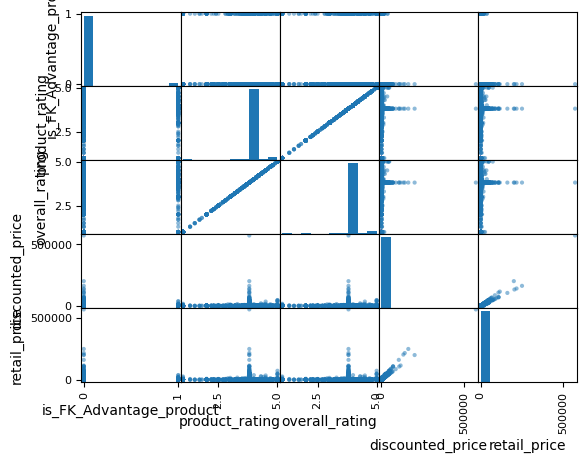

In [ ]:
from pandas.plotting import scatter_matrix
attributes=['is_FK_Advantage_product','product_rating','overall_rating','discounted_price','retail_price']
scatter_matrix(flipkart[attributes])

In [ ]:
import matplotlib.pyplot as plt

array([[<Axes: title={'center': 'retail_price'}>,
        <Axes: title={'center': 'discounted_price'}>,
        <Axes: title={'center': 'is_FK_Advantage_product'}>],
       [<Axes: title={'center': 'product_rating'}>,
        <Axes: title={'center': 'overall_rating'}>,
        <Axes: title={'center': 'brand'}>],
       [<Axes: title={'center': 'Catagory'}>, <Axes: >, <Axes: >]],
      dtype=object)

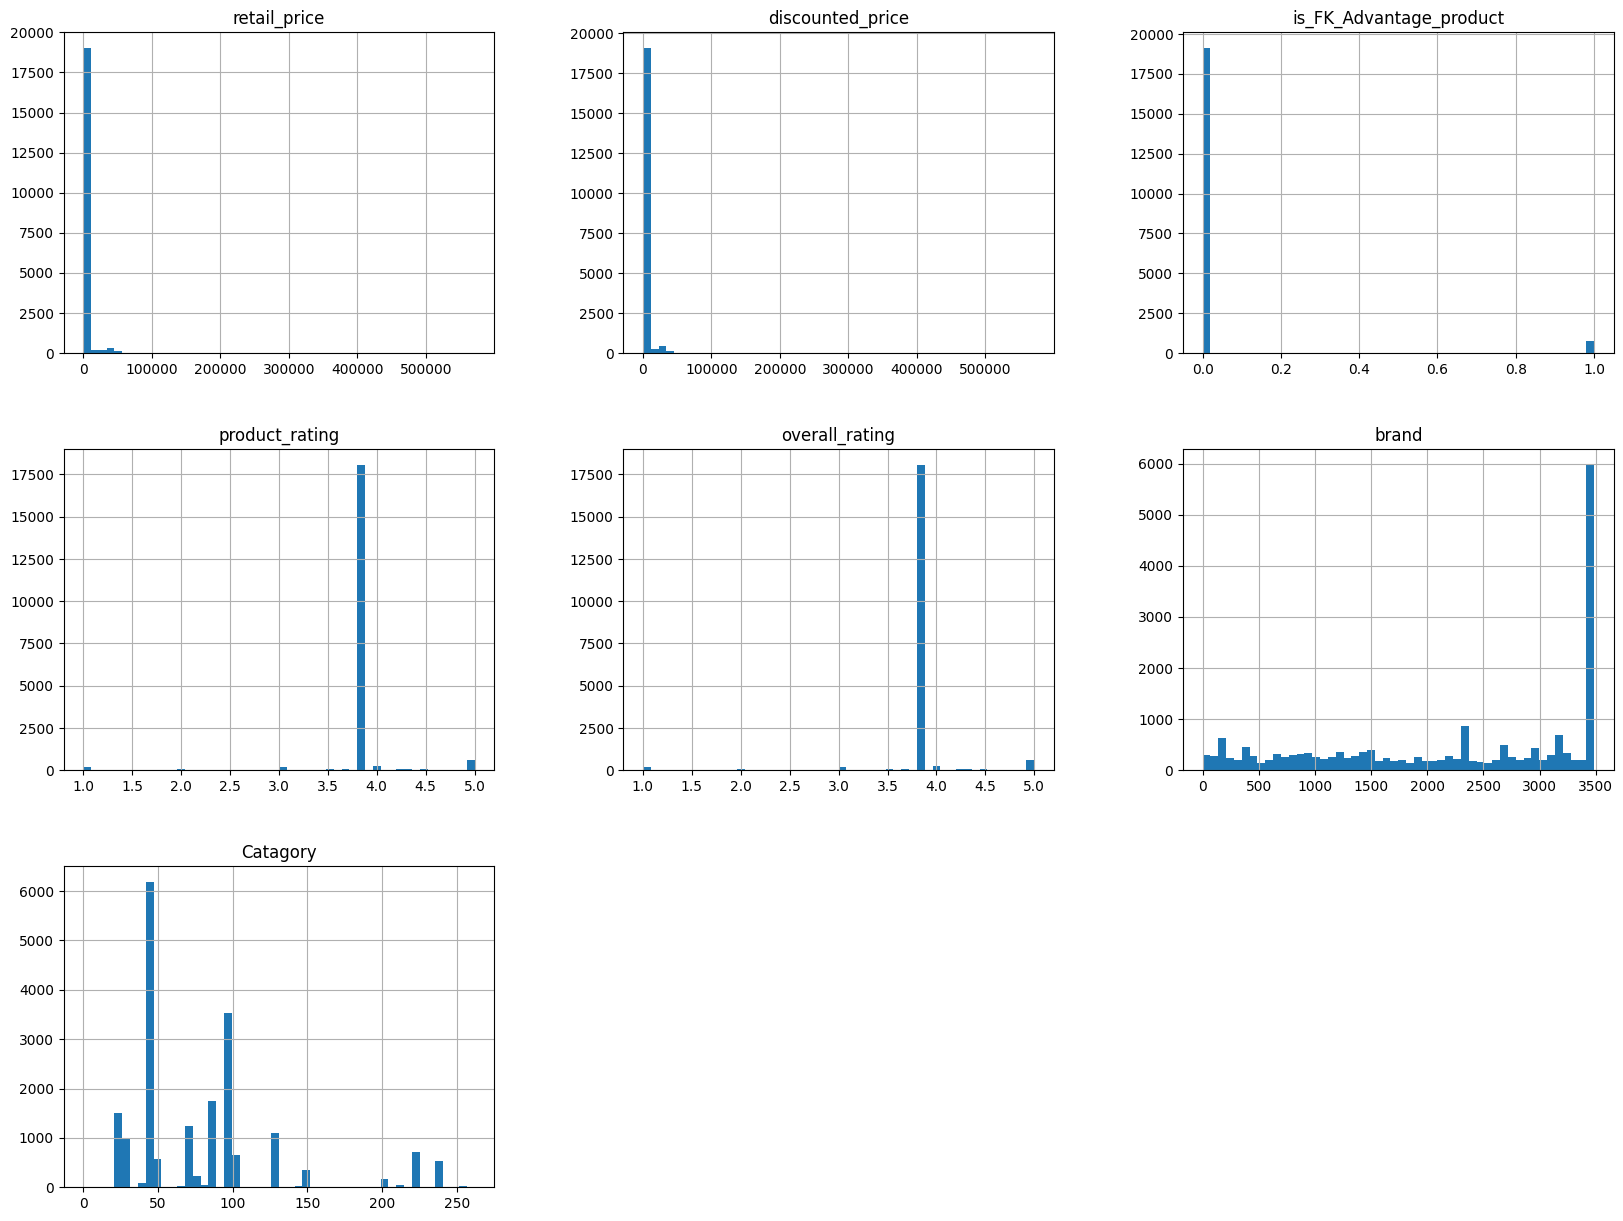

In [ ]:
flipkart.hist(bins= 50, figsize=(20,15))

# Model Selectoion- Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
#from sklearn.linear_model import LinearRegression
#model = LinearRegression()
#model.fit(X_train, y_train)

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#model = DecisionTreeClassifier()
#model.fit(X_train, y_train)

# Model loading

In [ ]:
from joblib import dump,load
dump(flipkart,'Flipkart.joblib')

['Flipkart.joblib']

# Testing

In [ ]:
input= np.array([[220.0,0	,3.807085,	3.807085	,2654,	150]])

In [ ]:
predict=model.predict(X_test)

In [ ]:
print(predict)

[ 426.54553968  246.06229598  283.58715873 ... 1332.          599.
 1619.6204884 ]


In [ ]:
y_test

18281     649.0
6968      199.0
4275      299.0
10143     690.0
860       500.0
          ...  
16832     175.0
12523     439.0
10865    1332.0
16939     599.0
17912    1749.0
Name: discounted_price, Length: 3985, dtype: float64

In [ ]:
model.score(X_test,y_test)

0.9840368369941093

# **Error Estimation With Mean sequared Error**

In [ ]:
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(y_test,predict)
rse= np.sqrt(mse)

In [ ]:
print(rse)

763.8215817204102


# **User Defined Input Testing**

In [ ]:
df = pd.DataFrame(columns = X.columns)
print(df)

Empty DataFrame
Columns: [retail_price, is_FK_Advantage_product, product_rating, overall_rating, brand, Catagory]
Index: []


In [ ]:
df = df.append({'retail_price' : 32157.0,'is_FK_Advantage_product' : 0,'product_rating': 3.8,'overall_rating':3.8,'brand':'FabHomeDecor'	,'Catagory':'Furniture' }, ignore_index = True)

<ipython-input-99-a4ab72d44203>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'retail_price' : 32157.0,'is_FK_Advantage_product' : 0,'product_rating': 3.8,'overall_rating':3.8,'brand':'FabHomeDecor'	,'Catagory':'Furniture' }, ignore_index = True)


In [ ]:
cols = ['brand',	'Catagory']
df[cols] = flipkart[cols].apply(LabelEncoder().fit_transform)
df.head()

,retail_price,is_FK_Advantage_product,product_rating,overall_rating,brand,Catagory
0,1100,1,4,4,162,43
1,32157.0,0,3.8,3.8,914,75


In [ ]:
#Results
model.predict(df)

array([  570.77733333, 22579.25      ])